<h2>Project - 01<h/2> 
    
<h2> Register Id: SIRSS2292 </h2>
    
    
Name: Mahesh Deshmukh
    
Team: 17

Team Members: 1)Mahesh Deshmukh
              2)Himanshu Goyal,
              3)Shreejit Sarkar,
              4)Sagar Patil,
              5)Tanya Priya

<b>Description:</b>
    
The project mainly describes sales data collected from the various stores in a city.
The main aim of the project is to predict the sales (Target Attribute) form the
dataset. The dataset contains 1017209 rows × 9 columns containing various stores
information.
TRAIN.csv consists of 9 attributes:
- Store
- DayOfWeek
- Date
- Sales (Target Attribute)
- Customers
- Open
- Promo
- StateHoliday
- SchoolHoliday

<b>Technologies used:</b>
- Numpy
- Pandas
- Matplotlib
- Seaborn
- ML Algorithms for predicting sales.

This project covers various machine learning concepts like EDA, one hot encoding and many more and it gives intuition to handle the traditional problem using machine learning.

In [1]:
# load the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup complete!')

Setup complete!


In [2]:
# Load the data
sale_data = pd.read_csv('train.csv')

C:\Users\91950\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
sale_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sale_data.shape

(1017209, 9)

The dataset contains 1017209 rows and 9 columns. We can say, this dataset is enough to train a machine learning model.

In [5]:
# Get a brief summary of Statistics terms.
sale_data.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Get the inforamtion about this dataset
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


From above, seven columns are integer data types, and two columns are object data types. Here, Sales has our target column, and other columns have independent columns.

### Data Wrangling

In [7]:
# Deal with duplicate data
sale_data.duplicated().sum()

0

In [8]:
# Deal with missing data
sale_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Data Visualization.

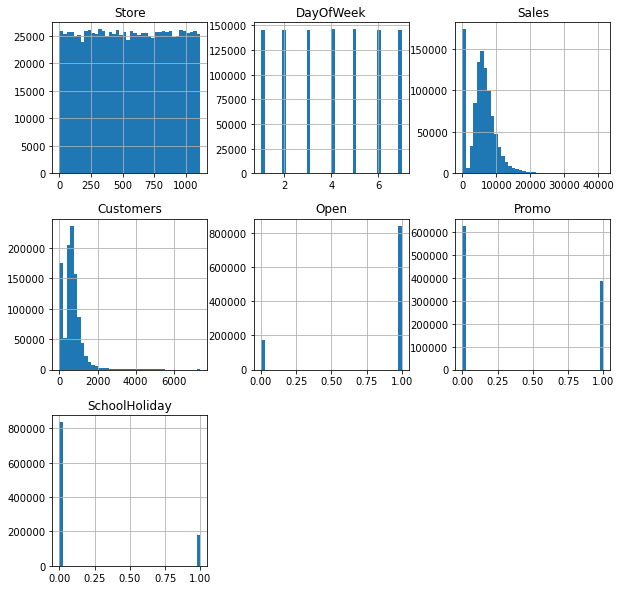

In [9]:
# Q1) How have the data spread out?

sale_data.hist(bins=40,figsize=(10,10))
plt.show()

From the graph, the store data has a uniform distribution. Day of week, open, promo, and school holiday has Bernoulli distribution. Sales and Customers has Chi-Squared distribution.

In [10]:
# Q) Which date sales are more?, and How?
more_sale = sale_data.groupby('Date').Sales.max()

In [11]:
print(f'The Date {more_sale.idxmax()} is more sales, and the sales have {more_sale.max()}')

The Date 2015-06-22 is more sales, and the sales have 41551


In [12]:
# Q) Which date sales are less?, and How?
print(f'The Date {more_sale.idxmin()} is less sales, and the sales have {more_sale.min()}')

The Date 2013-12-24 is less sales, and the sales have 16016


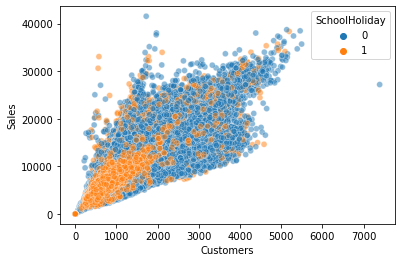

In [13]:
# Q) Find the relation between Customers and Sales.

sns.scatterplot(x=sale_data['Customers'],y=sale_data['Sales'],hue=sale_data['SchoolHoliday'],data=sale_data,alpha=0.5)
plt.show()

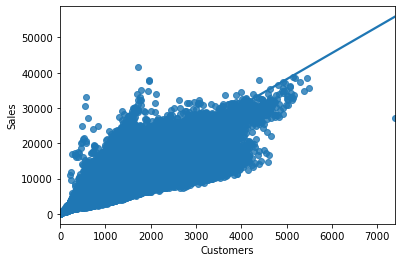

In [14]:
sns.regplot(x=sale_data['Customers'],y=sale_data['Sales'],data=sale_data)
plt.show()

The Graph shows the more customers, the more sales. So the relation is a positive correlation.

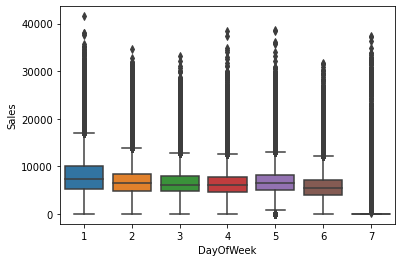

In [15]:
# Q) What is the relation between Day Of Week and Sales?
sns.boxplot(x=sale_data['DayOfWeek'],y=sale_data['Sales'],data=sale_data)
plt.show()

From graph, there are lot of outliers present.

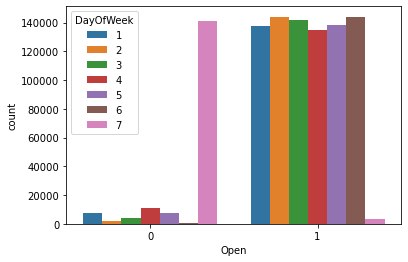

In [16]:
# Q) Which day shops are mostly closed?
sns.countplot(x='Open',hue='DayOfWeek',data=sale_data)
plt.show()

From the graph, the 7th day is mostly the closed day for the shop.

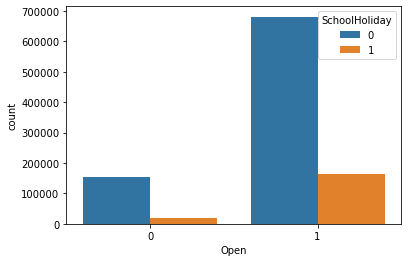

In [17]:
sns.countplot(x='Open',hue='SchoolHoliday',data=sale_data)
plt.show()

From the graph, the Most shop was closed, but School Holiday hadn't. 

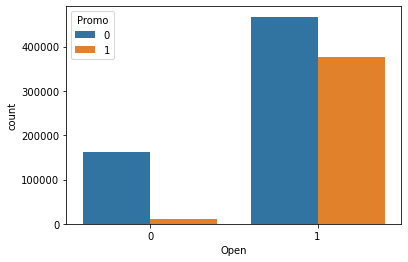

In [18]:
sns.countplot(x='Open',hue='Promo',data=sale_data)
plt.show()

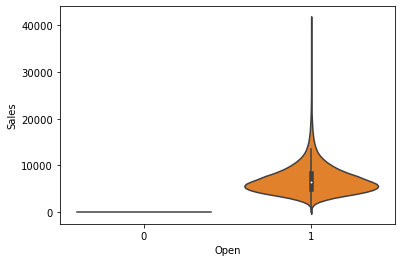

In [19]:
sns.violinplot(x='Open',y='Sales',data=sale_data)
plt.show()

When the shop was open, the sales were between range 0 to 12000.

In [20]:
sale_data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

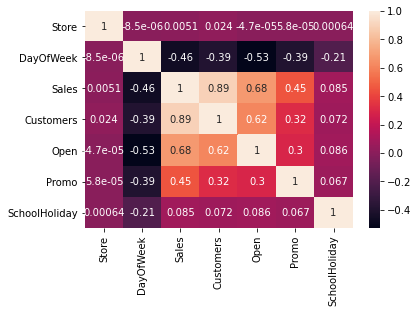

In [21]:
# Q) Which features is more dependent on sale columns?

sns.heatmap(data=sale_data.corr(),annot=True)
plt.show()

Customers, open and promo are positively dependent on sales, and Day of the week is negatively related to sales. 

Machine learning can not handle categorical columns. So we should convert categorical data into numerical data. In this data set, only two columns are categorical. But one of the Date columns, we can't convert categorical to numerical. Because there are a lot of unique values of Date columns. 

In [22]:
sale_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [23]:
# Here, we have used the label method to convert categorical data into numerical data. 
sale_data['StateHoliday'] = sale_data['StateHoliday'].map({'0':0,'a':1,'b':2,'c':3,0:4}).astype(int)


In [24]:
sale_data['StateHoliday']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: StateHoliday, Length: 1017209, dtype: int32

In [25]:
sale_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Model Creation

In [26]:
# Separate the dependent and independent columns to create a model. 

sale_data_copy = sale_data.copy()

In [27]:
# Dependent column
y = sale_data_copy['Sales']

In [28]:
# Independent columns
X = sale_data_copy.loc[:,['DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']]

In [29]:
X.shape

(1017209, 6)

In [30]:
y.shape

(1017209,)

In [31]:
# Data split into train and test.
from sklearn.model_selection import train_test_split   

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
X_train.shape

(712046, 6)

In [34]:
X_test.shape

(305163, 6)

In [35]:
# libraries for model building
from sklearn.linear_model import LinearRegression,ARDRegression,HuberRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries for model testing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
# Create function for getting mean absolute error.
def get_mae(model_name, train_X, val_x, train_y, val_y):
    model = model_name()
    model.fit(train_X,train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y,preds_val)
    return mae

In [37]:
List = [LinearRegression,RandomForestRegressor,DecisionTreeRegressor,ARDRegression,HuberRegressor,ExtraTreesRegressor,GradientBoostingRegressor]
for i in List:
    my_mae = get_mae(i, X_train, X_test, y_train, y_test)
    print(f"Model Name: {i()}  \t\t Mean Absolute Error:  {my_mae}")

Model Name: LinearRegression()  		 Mean Absolute Error:  987.6820869016175
Model Name: RandomForestRegressor()  		 Mean Absolute Error:  933.1145246508781
Model Name: DecisionTreeRegressor()  		 Mean Absolute Error:  955.5410031361265
Model Name: ARDRegression()  		 Mean Absolute Error:  987.6728816406902
Model Name: HuberRegressor()  		 Mean Absolute Error:  963.9137356751758
Model Name: ExtraTreesRegressor()  		 Mean Absolute Error:  946.2121451708034
Model Name: GradientBoostingRegressor()  		 Mean Absolute Error:  897.8603221610575


In [38]:
def get_mse(model_name, train_X, val_x, train_y, val_y):
    model = model_name()
    model.fit(train_X,train_y)
    preds_val = model.predict(val_x)
    mse = mean_squared_error(val_y,preds_val)
    return mse

In [39]:
List = [LinearRegression,RandomForestRegressor,DecisionTreeRegressor,ARDRegression,HuberRegressor,ExtraTreesRegressor,GradientBoostingRegressor]
for i in List:
    my_mse = get_mse(i, X_train, X_test, y_train, y_test)
    print(f"Model Name: {i()}  \t\t Mean Squared Error:  {my_mse}")

Model Name: LinearRegression()  		 Mean Squared Error:  2177692.3156544743
Model Name: RandomForestRegressor()  		 Mean Squared Error:  2059535.7313097697
Model Name: DecisionTreeRegressor()  		 Mean Squared Error:  2284737.943141978
Model Name: ARDRegression()  		 Mean Squared Error:  2177690.36013438
Model Name: HuberRegressor()  		 Mean Squared Error:  2227466.8589844997
Model Name: ExtraTreesRegressor()  		 Mean Squared Error:  2176804.1108100363
Model Name: GradientBoostingRegressor()  		 Mean Squared Error:  1839816.8975320044


The GradientBoostingRegressor is the best model for us.

In [46]:
# Model tuning.
def gbd_get_mae(ite, train_X, val_X, train_y, val_y):
    model = GradientBoostingRegressor(max_leaf_nodes=ite,n_estimators=ite, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


In [47]:
# Compare MAE with differing values of max_leaf_nodes and n_estimators
for iteration in [100, 150, 200, 250 ]:
    my_mae = gbd_get_mae(iteration, X_train, X_test, y_train, y_test)
    print("iteration : %d  \t\t Mean Absolute Error:  %f" %(iteration, my_mae))

iteration : 100  		 Mean Absolute Error:  897.860322
iteration : 150  		 Mean Absolute Error:  896.390428
iteration : 200  		 Mean Absolute Error:  895.446276
iteration : 250  		 Mean Absolute Error:  894.716800


Here, the value for n_estimators and max_leaf_nodes is 250.

In [48]:
# Final model
final_model = GradientBoostingRegressor(n_estimators=250,max_leaf_nodes=250,random_state=0) 

In [49]:
final_model.fit(X,y)

GradientBoostingRegressor(max_leaf_nodes=250, n_estimators=250, random_state=0)

In [50]:
final_pred = final_model.predict(X)

In [51]:
mean_absolute_error(y,final_pred)

894.2574722115959

In [52]:
mean_squared_error(y,final_pred)

1827250.6858904846

In [ ]:
# Thank you for your time!